# Weekly Awesome Tricks And Best Practices From Kaggle
## Easily learn what is only learnt by hard practice
<img src='images/forest.jpg'></img>
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@jplenio?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Johannes Plenio</a>
        on 
        <a href='https://www.pexels.com/photo/silhouette-of-a-man-during-sunset-1114897/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels</a>
    </strong>
</figcaption>

### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [45]:
houses = pd.read_csv('data/melb_data.csv')

### Intro to This Project

### 1. Plotting Only the Lower Part of Correlation Matrix

A good correlation matrix can tell a lot about your dataset. It is common to plot it to see the pairwise correlation between your features and the target variable. According to your needs, you can decide which features to keep and feed to your ML algorithm. 

But today, datasets contain so many features that it can be overwhelming to look at correlation matrices like below:

<img src='images/corr.png'></img>

However nice, there is just too much information to take in. Mostly, correlation matrices are symmetrical along the main diagonal, so they contain duplicate data. Also, the diagonal itself is useless. Let's see how we can plot only the useful half of the matrix:

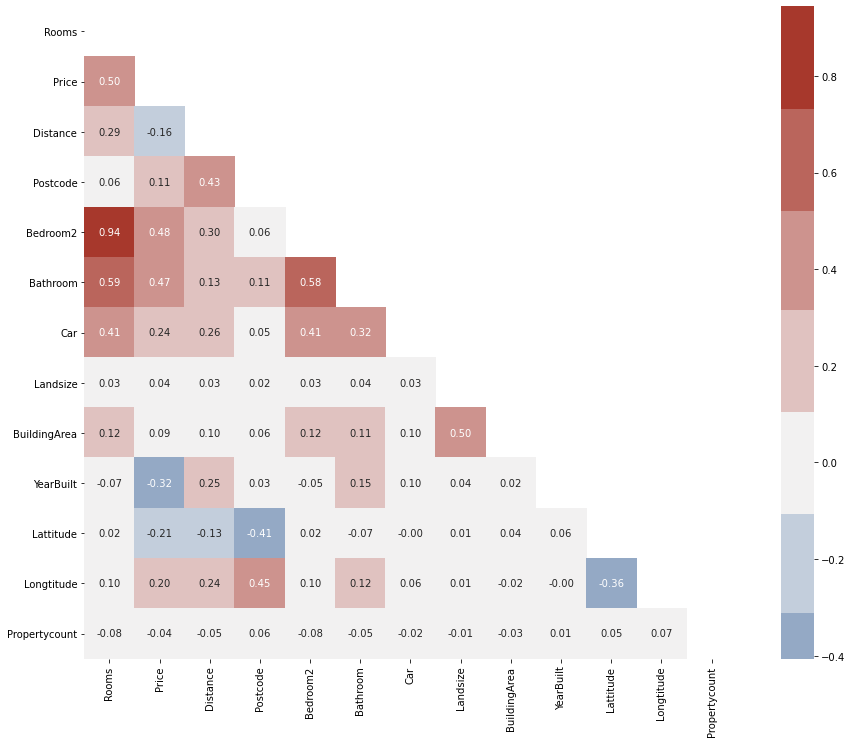

In [61]:
# Calculate pairwise-correlation
matrix = houses.corr()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                                  n=9, center="light")

plt.figure(figsize=(16, 12))
sns.heatmap(matrix, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show();

The resulting plot is much easier to interpret and free of distractions. First, we build the correlation matrix using `.corr` method of our DataFrame. Then, we use `np.ones_like` function with `dtype` set to `bool` to create a matrix of `True` values with the same shape as our DataFrame:

In [68]:
np.ones_like(matrix, dtype=bool)[:5]

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True]])

Then, we pass it to Numpy's `.triu` function which returns a 2D boolean mask which contains `False` values for the lower triangle of the matrix. Then, we can pass it to Seaborn's `heatmap` function to subset the matrix according to this mask:

```python
sns.heatmap(matrix, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)
```

I also made a few additions to make the plot a bit nicer like adding a custom color palette.

### 2. Include missing values in `value_counts`

A handy little trick with `value_counts` is that you can see the proportion of missing values in any column by setting `dropna` to False:

In [87]:
houses.CouncilArea.value_counts(dropna=False, normalize=True).head()

NaN              0.100810
Moreland         0.085641
Boroondara       0.085420
Moonee Valley    0.073417
Darebin          0.068778
Name: CouncilArea, dtype: float64

By determining the proportion of values that are missing, you can make a decision as to whether drop or impute them. However, if you want to look at proportion of missing values across all columns, `value_counts` is not the best option. Instead you can do:

In [92]:
missing_props = houses.isna().sum() / len(houses)
missing_props[missing_props > 0].sort_values(ascending=False)

BuildingArea    0.474963
YearBuilt       0.395803
CouncilArea     0.100810
Car             0.004566
dtype: float64

First, find the proportions by dividing the number of missing values by the length of the dataframe. Then, you can filter out columns with 0%, i. e. only choose columns with missing values.

### 3. 